In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat

pd.set_option('display.max_columns', 9999)
%matplotlib inline

In [214]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
tm = pd.read_csv('eicu-collaborative-research-database-2.0/treatment.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')
cpg = pd.read_csv('eicu-collaborative-research-database-2.0/carePlanGeneral.csv.gz')
lab = pd.read_csv('eicu-collaborative-research-database-2.0/lab.csv.gz')

In [215]:
pts = pts[pts.gender != 'Unknown']
pts = pts[pts.gender != 'Other']
pts = pts[pts.unitadmitsource == 'Emergency Department']
pts = pd.merge(pts, hos, on=['hospitalid'], how = 'left')

In [265]:
def age (x):
    if x == '> 89':
        return 90
    else:
        return int(x)
    
def pain_val (x, arr):
    try:
        return round(arr['nursingchartvalue'][x])
    except:
        return np.nan

In [217]:
pts['hospitaladmitsource'].fillna(value = 'Unknown', inplace = True)

pts['age'].fillna(value = 0, inplace = True)
pts['age'] = pts['age'].apply(lambda x: age(x))

In [218]:
pts['sepsis'] = pts['apacheadmissiondx'].str.contains('sepsis', case = False).fillna(False)
pts['mi'] = pts['apacheadmissiondx'].str.contains('MI', case = False).fillna(False)
pts['trauma'] = pts['apacheadmissiondx'].str.contains('trauma', case = False).fillna(False)

In [219]:
pts.sepsis= pts.sepsis.apply(lambda x: int(x == True))
pts.mi= pts.mi.apply(lambda x: int(x == True))
pts.trauma= pts.trauma.apply(lambda x: int(x == True))

In [220]:
pts['none'] = 0
pts.loc[(pts['sepsis'] == 0) & (pts['mi'] == 0) & (pts['trauma'] == 0), 'none'] = int(1)

In [221]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none
0,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870,<100,f,Midwest,0,0,0,1
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Alive,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),Alive,002-37665,NaN,f,Midwest,1,0,0,0
2,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,-1,Emergency Department,2015,21:30:00,606,Other Hospital,Alive,Med-Surg ICU,11:24:00,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,Alive,002-34521,>= 500,t,Midwest,0,0,0,1
3,141229,128970,Female,90,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,-4,Emergency Department,2014,22:15:00,3499,Skilled Nursing Facility,Alive,Med-Surg ICU,11:56:00,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,Alive,002-54296,100 - 249,f,Midwest,0,0,0,1
4,141260,128995,Female,43,African American,73,99,Asthma,172.7,01:57:00,-18,Emergency Department,2015,09:34:00,1879,Other,Alive,Med-Surg ICU,02:15:00,Emergency Department,1,admit,69.9,70.3,20:08:00,1073,Floor,Alive,002-55885,>= 500,t,Midwest,0,0,0,1


In [222]:
lab.head()

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,52307161,141168,2026,3,fibrinogen,177.0,177,mg/dL,mg/dL,2219
1,50363251,141168,1133,3,PT - INR,2.5,2.5,ratio,NaN,1208
2,49149139,141168,2026,1,magnesium,2.0,2.0,mg/dL,mg/dL,2090
3,50363250,141168,1133,3,PT,26.6,26.6,sec,sec,1208
4,66695374,141168,2141,7,pH,7.2,7.20,NaN,Units,2155


In [223]:
ptinr = lab[lab.labname == 'PT - INR']

In [224]:
ptinr_mean = ptinr[['patientunitstayid', 'labresult']].groupby('patientunitstayid').mean()
ptinr_max = ptinr[['patientunitstayid', 'labresult']].groupby('patientunitstayid').max()

In [225]:
def ptinr_res (x, arr):
    try:
        return round(arr['labresult'][x] * 2) / 2
    except:
        return np.nan

In [226]:
pts['max_ptinr'] = pts['patientunitstayid'].apply(lambda x: ptinr_res(x, ptinr_max))
pts['mean_ptinr'] = pts['patientunitstayid'].apply(lambda x: ptinr_res(x, ptinr_mean))

In [260]:
pts['deceased'] = (pts.hospitaldischargestatus == 'Expired') | (pts.unitdischargestatus == 'Expired')
pts.drop(columns=['hospitaldischargestatus', 'unitdischargestatus'], inplace = True)

In [261]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none,max_ptinr,mean_ptinr,deceased
0,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),002-33870,<100,f,Midwest,0,0,0,1,NaN,NaN,False
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),002-37665,NaN,f,Midwest,1,0,0,0,NaN,NaN,False
2,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,-1,Emergency Department,2015,21:30:00,606,Other Hospital,Med-Surg ICU,11:24:00,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,002-34521,>= 500,t,Midwest,0,0,0,1,NaN,NaN,False
3,141229,128970,Female,90,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,-4,Emergency Department,2014,22:15:00,3499,Skilled Nursing Facility,Med-Surg ICU,11:56:00,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,002-54296,100 - 249,f,Midwest,0,0,0,1,4.5,4.0,False
4,141260,128995,Female,43,African American,73,99,Asthma,172.7,01:57:00,-18,Emergency Department,2015,09:34:00,1879,Other,Med-Surg ICU,02:15:00,Emergency Department,1,admit,69.9,70.3,20:08:00,1073,Floor,002-55885,>= 500,t,Midwest,0,0,0,1,NaN,NaN,False


___
#### Figures

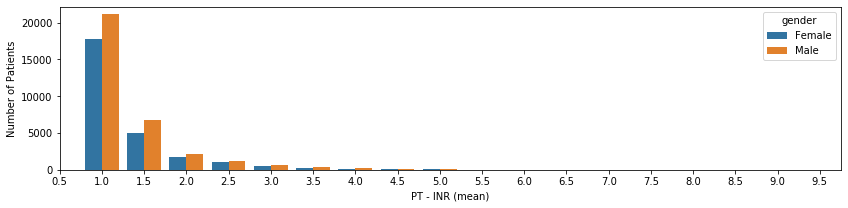

In [254]:
plt.figure(figsize=(14, 3))
sns.barplot(x='mean_ptinr',y='patientunitstayid',hue='gender',data=pts, estimator=np.count_nonzero)
plt.xlim([0, 18.5])
plt.xlabel('PT - INR (mean)')
plt.ylabel('Number of Patients')
#plt.savefig('figures/1C-ptinr-dist.png', dpi=300, transparent=True, bbox_inches='tight')

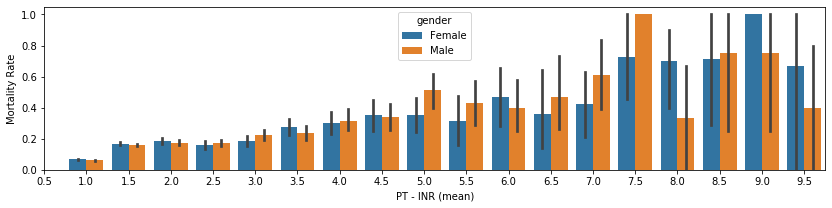

In [255]:
plt.figure(figsize=(14, 3))
sns.barplot(x='mean_ptinr',y='deceased',hue='gender',data=pts)
plt.xlim([0, 18.5])
plt.xlabel('PT - INR (mean)')
plt.ylabel('Mortality Rate')
#plt.savefig('figures/1B-ptinr-mortality.png', dpi=300, transparent=True, bbox_inches='tight')

In [204]:
pts['cond'] = (pts.iloc[:, 32:36] == 1).idxmax(1)

In [208]:
pts_none = pts[pts.cond != 'none']

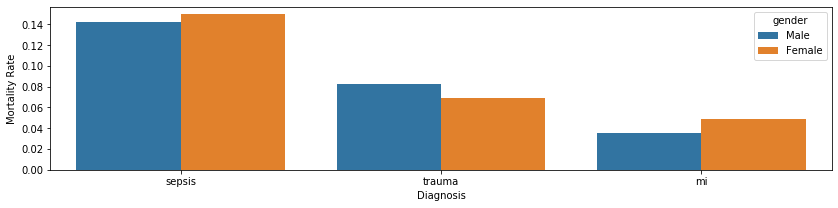

In [256]:
plt.figure(figsize=(14, 3))
sns.barplot(x='cond',y='deceased',hue='gender',data=pts_none, estimator = np.mean, ci=None)
plt.xlabel('Diagnosis')
plt.ylabel('Mortality Rate')
#plt.savefig('figures/1A-trauma-sepsis-mi.png', dpi=300, transparent=True, bbox_inches='tight')

___
#### Trauma Analysis

In [426]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')
lab = pd.read_csv('eicu-collaborative-research-database-2.0/lab.csv.gz')

In [427]:
pts = pts[pts.gender != 'Unknown']
pts = pts[pts.gender != 'Other']
pts = pts[pts.unitadmitsource == 'Emergency Department']
pts = pd.merge(pts, hos, on=['hospitalid'], how = 'left')

In [428]:
def age (x):
    if x == '> 89':
        return 90
    else:
        return int(x)

In [429]:
pts['hospitaladmitsource'].fillna(value = 'Unknown', inplace = True)

pts['age'].fillna(value = 0, inplace = True)
pts['age'] = pts['age'].apply(lambda x: age(x))

In [430]:
pts = pts[pts['apacheadmissiondx'].str.contains('trauma', case = False).fillna(False)]

In [431]:
# adding icd9 codes
dxs = dxs.drop(columns=['diagnosisid', 'activeupondischarge', 'diagnosisoffset', 'diagnosisstring'])
dxs.dropna(inplace=True)

# merge
dxs = dxs.groupby('patientunitstayid')['icd9code'].apply(list).reset_index(name='icd9codes')
pts = pd.merge(pts, dxs, on=['patientunitstayid'], how='left')

In [432]:
pts = pts.drop(columns=['hospitaladmittime24', 'hospitaldischargeyear', 'hospitaldischargetime24',
                       'unitadmittime24', 'dischargeweight', 'unitdischargetime24', 'patienthealthsystemstayid'])

In [433]:
lab.drop(columns=['labresultoffset', 'labtypeid', 'labresulttext', 'labresultrevisedoffset', 'labid'], inplace = True)

In [434]:
def lab_val (x, arr):
    try:
        return round(arr['labresult'][x], 1)
    except:
        return 0

In [435]:
# labs = ['PT - INR', 'lactate', 'platelets x 1000', 'WBC x 1000', 'Hgb', 'potassium', 'Hct', 'sodium']
labs = list(lab.labname.unique())

for i in labs:
    lab_df = lab[lab.labname == i].groupby('patientunitstayid').mean()
    pts[i] = pts['patientunitstayid'].apply(lambda x: lab_val(x, lab_df))
    print ('Done:', i)

Done: fibrinogen
Done: PT - INR
Done: magnesium
Done: PT
Done: pH
Done: urinary creatinine
Done: MCH
Done: BUN
Done: urinary sodium
Done: HCO3
Done: lactate
Done: CPK
Done: PTT
Done: FiO2
Done: -lymphs
Done: Base Deficit
Done: BNP
Done: chloride
Done: uric acid
Done: troponin - I
Done: paO2
Done: -eos
Done: platelets x 1000
Done: anion gap
Done: LPM O2
Done: MCV
Done: paCO2
Done: RBC
Done: RDW
Done: MCHC
Done: alkaline phos.
Done: WBC x 1000
Done: creatinine
Done: calcium
Done: Hgb
Done: bicarbonate
Done: potassium
Done: -polys
Done: -monos
Done: CPK-MB
Done: total bilirubin
Done: -basos
Done: phosphate
Done: ALT (SGPT)
Done: Hct
Done: AST (SGOT)
Done: glucose
Done: total protein
Done: sodium
Done: albumin
Done: salicylate
Done: Acetaminophen
Done: ethanol
Done: WBC's in urine
Done: bedside glucose
Done: urinary specific gravity
Done: direct bilirubin
Done: Total CO2
Done: Base Excess
Done: folate
Done: ammonia
Done: TSH
Done: Vitamin B12
Done: -bands
Done: LDL
Done: total cholesterol


In [436]:
pts.columns[pts.isnull().any()]

Index(['gender', 'ethnicity', 'admissionheight', 'hospitaldischargelocation',
       'hospitaldischargestatus', 'admissionweight', 'unitdischargelocation',
       'numbedscategory', 'region', 'icd9codes', 'fibrinogen', 'PT - INR',
       'PT', 'pH', 'BUN', 'urinary sodium', 'lactate', 'CPK', 'PTT', 'FiO2',
       'Base Deficit', 'troponin - I', 'paO2', 'platelets x 1000', 'LPM O2',
       'paCO2', 'RBC', 'bicarbonate', 'CPK-MB', 'total bilirubin', '-basos',
       'phosphate', 'ALT (SGPT)', 'AST (SGOT)', 'total protein', 'salicylate',
       'Acetaminophen', 'ethanol', 'WBC's in urine',
       'urinary specific gravity', 'direct bilirubin', 'Base Excess', 'folate',
       'ammonia', 'TSH', 'Vitamin B12', 'HDL', 'Carboxyhemoglobin',
       'O2 Sat (%)', 'Methemoglobin', 'TIBC', 'Vancomycin - trough',
       'prealbumin', 'lipase', 'CRP', 'LDH', 'Vancomycin - random',
       'protein S', 'Digoxin', 'protein C', 'free T4', 'protein - CSF',
       'haptoglobin', 'urinary osmolality', 'seru

In [437]:
missinglabs = ['fibrinogen', 'PT - INR',
       'PT', 'pH', 'BUN', 'urinary sodium', 'lactate', 'CPK', 'PTT', 'FiO2',
       'Base Deficit', 'troponin - I', 'paO2', 'platelets x 1000', 'LPM O2',
       'paCO2', 'RBC', 'bicarbonate', 'CPK-MB', 'total bilirubin', '-basos',
       'phosphate', 'ALT (SGPT)', 'AST (SGOT)', 'total protein', 'salicylate',
       'Acetaminophen', 'ethanol', "WBC's in urine",
       'urinary specific gravity', 'direct bilirubin', 'Base Excess', 'folate',
       'ammonia', 'TSH', 'Vitamin B12', 'HDL', 'Carboxyhemoglobin',
       'O2 Sat (%)', 'Methemoglobin', 'TIBC', 'Vancomycin - trough',
       'prealbumin', 'lipase', 'CRP', 'LDH', 'Vancomycin - random',
       'protein S', 'Digoxin', 'protein C', 'free T4', 'protein - CSF',
       'haptoglobin', 'urinary osmolality', 'serum osmolality',
       '24 h urine urea nitrogen', 'amylase', 'myoglobin', 'cortisol',
       'Phenytoin', 'Phenobarbital', '24 h urine protein',
       'Gentamicin - random', 'Lithium', 'T3', 'Vent Rate', 'Carbamazepine',
       'Tobramycin - trough', 'T3RU', 'CPK-MB INDEX', 'Temperature', 'TV',
       'troponin - T', 'Pressure Support', 'Mode', 'Spontaneous Rate', 'Site',
       'O2 Content', 'cd 4', "WBC's in peritoneal fluid", 'HSV 1&2 IgG AB']

In [438]:
pts[missinglabs] = pts[missinglabs].fillna(value=0)

In [439]:
pts['admissionheight'] = pts['admissionheight'].fillna(value=pts.admissionheight.median())
pts['admissionweight'] = pts['admissionweight'].fillna(value=pts.admissionweight.median())

In [440]:
for x in list(pts.columns[pts.isnull().any()]):
    print (x, ":", pts[x].isnull().sum())

gender : 1
ethnicity : 60
hospitaldischargelocation : 67
hospitaldischargestatus : 62
unitdischargelocation : 3
numbedscategory : 391
region : 264
icd9codes : 350


In [441]:
pts.icd9codes = pts.icd9codes.fillna(value='None')

def icd_list(x):
    if type(x) == list:
        return x
    else:
        return [x]

pts.icd9codes = pts.icd9codes.apply(lambda x: icd_list(x))

In [442]:
pts.dropna(inplace = True)

In [443]:
pts['deceased'] = (pts.hospitaldischargestatus == 'Expired') | (pts.unitdischargestatus == 'Expired')
pts.drop(columns=['hospitaldischargestatus', 'unitdischargestatus'], inplace = True)

In [444]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# one hot ecoding

pts = pts.join(pd.DataFrame(mlb.fit_transform(pts.pop('icd9codes')), columns=mlb.classes_, index=pts.index))

In [445]:
cat_cols = ['gender', 'ethnicity','hospitalid','wardid','apacheadmissiondx','hospitaladmitsource','unittype',
            'unitadmitsource','unitvisitnumber','unitstaytype', 'numbedscategory','teachingstatus','region']

pts = pd.get_dummies(pts, columns = cat_cols, drop_first = False)

In [486]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier


X = pts.drop(columns=['unitdischargelocation', 'uniquepid', 'patientunitstayid','deceased', 'hospitaldischargelocation'])
y = pts.deceased

In [487]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [489]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

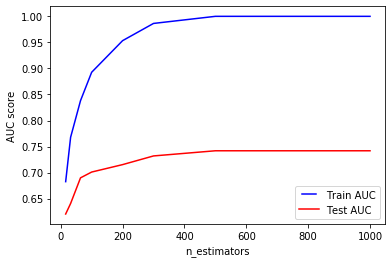

In [463]:
n_estimators = [16, 32, 64, 100, 200, 300, 500, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
#plt.savefig('figures/estimators.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

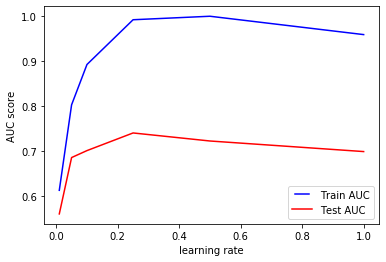

In [464]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
#plt.savefig('figures/learningrate.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

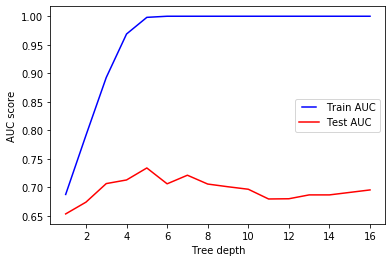

In [465]:
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
#plt.savefig('figures/treedepth.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

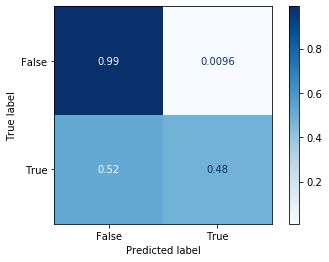

In [490]:
gb_clf2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.25, max_depth=5, random_state=0)
gb_clf2.fit(X_train, y_train)

y_pred = gb_clf2.predict(X_test)

metrics.plot_confusion_matrix(gb_clf2, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')
plt.savefig('figures/confusion_matrix_trauma.png', dpi=300, transparent=True, bbox_inches='tight')

In [491]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98      1248
        True       0.78      0.48      0.59        90

    accuracy                           0.96      1338
   macro avg       0.87      0.73      0.78      1338
weighted avg       0.95      0.96      0.95      1338



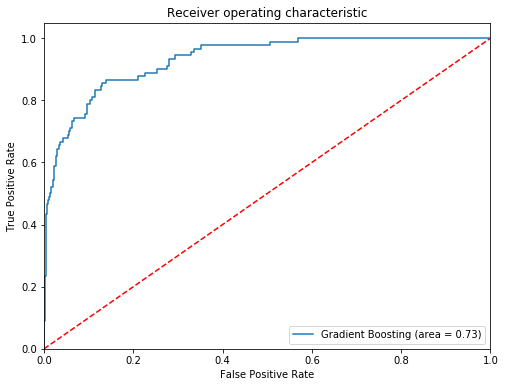

In [492]:
roc_auc = roc_auc_score(y_test, gb_clf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('figures/3A-ROC-trauma.png', dpi=300, bbox_inches='tight')
plt.show()

In [478]:
import shap

shap_values = shap.TreeExplainer(gb_clf2).shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [481]:
X = pts.drop(columns=['unitdischargelocation', 'uniquepid', 'patientunitstayid','deceased', 'hospitaldischargelocation'])
y = pts.deceased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [482]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns, vals)), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)

,col_name,feature_importance_vals
0,age,0.849972
3,hospitaldischargeoffset,0.800465
52,glucose,0.620999
19,FiO2,0.367195
26,paO2,0.329275
37,WBC x 1000,0.322638
28,platelets x 1000,0.314830
5,unitdischargeoffset,0.307628
23,chloride,0.285856
41,bicarbonate,0.241988


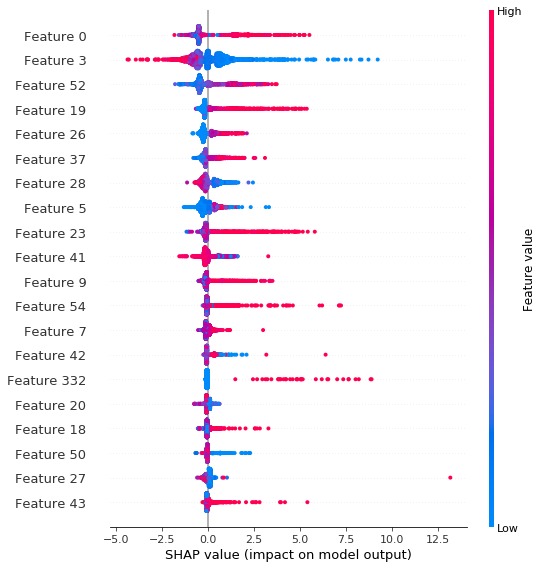

<Figure size 432x288 with 0 Axes>

In [493]:
shap.summary_plot(shap_values, X_train)
plt.savefig('figures/3B-SHAPscoretrauma.png', dpi=300, transparent=True, bbox_inches='tight')

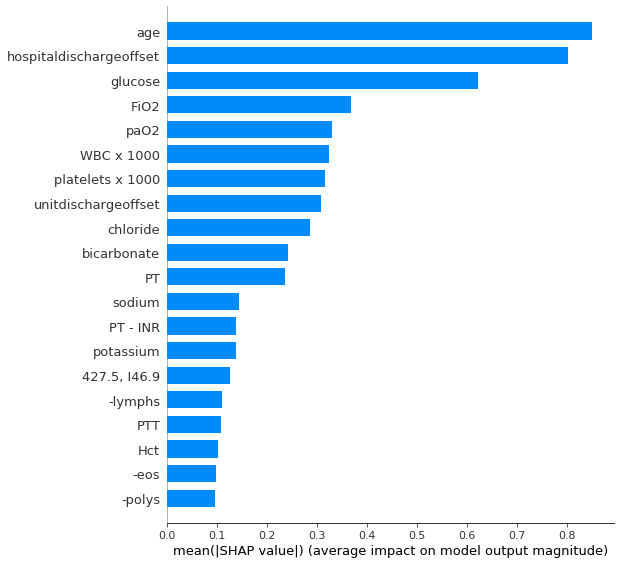

In [484]:
shap.summary_plot(shap_values, X_train, plot_type='bar')